# Demo: Single Curvelet

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from curvelops import FDCT2D

### Setup

In [2]:
m = 512
n = 512
x = np.zeros((m * n))
DCT = FDCT2D((m, n))

### Curvelet Domain

In [3]:
y = DCT * x

# Convert to a curvelet struct indexed by
# [scale, wedge (angle), x, y]
y_reshape = DCT.struct(y)

In [4]:
# Select single curvelet
s = 4
w = 0
a, b = y_reshape[s][w].shape
y_reshape[s][w][a//2, b//2] = 1
y = DCT.vect(y_reshape)

In [5]:
# Perform adjoint transform and reshape
x = DCT.H * y
x = x.reshape(m, n)

In [6]:
# F-K domain
x_fk = np.fft.fft2(x)
x_fk = np.fft.fftshift(x_fk)

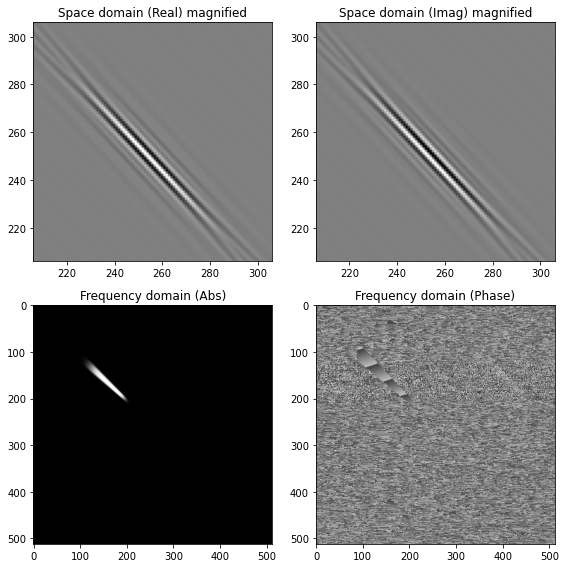

In [7]:
# Visualize
vmin, vmax = 0.8 * np.array([-1,1]) * np.abs(np.max(x))
fig, ax = plt.subplots(2,2, figsize=(8,8))
ax[0, 0].imshow(np.real(x.T), cmap='gray', vmin=vmin, vmax=vmax)
ax[0, 1].imshow(np.imag(x.T), cmap='gray', vmin=vmin, vmax=vmax)
ax[1, 0].imshow(np.abs(x_fk.T), cmap='gray', vmin=0)
ax[1, 1].imshow(np.angle(x_fk.T, deg=True), cmap='gray', vmin=-180, vmax=180)
ax[0, 0].set(xlim=(m//2 - 50, m//2 + 50), ylim=(n//2 - 50, n//2 + 50), title='Space domain (Real) magnified')
ax[0, 1].set(xlim=(m//2 - 50, m//2 + 50), ylim=(n//2 - 50, n//2 + 50), title='Space domain (Imag) magnified')
ax[1, 0].set(title='Frequency domain (Abs)')
ax[1, 1].set(title='Frequency domain (Phase)')
fig.tight_layout()